# Mobile Price Prediction

A machine learning project for predicting mobile phone prices based on feature extraction and analysis.

## Problem Statement

In the competitive mobile phone market, accurate pricing is essential for boosting sales and maintaining profitability. Our organization, a leading mobile phone seller, aims to strengthen its pricing strategy by identifying key features that impact mobile phone prices.
The objective of this project is to build a machine learning model that predicts mobile phone prices based on features such as model, memory, RAM, battery capacity, cameras, AI lens presence, mobile height, and processor type.
This involves data acquisition, data wrangling, feature extraction, model building, and evaluation.
The final output will deliver insights into the most influential features affecting price, helping the organization make smarter, data-driven pricing decisions.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv(r"original_dataset/Processed_Flipdata.csv")

## Display the first 5 rows to understand the dataset

In [3]:
display(df.head())

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


## Check the dimensions of the dataset

In [4]:
display(df.shape)

(541, 12)

The Dataset contains 541 Rows and 12 Columns

## Check data types of the dataset

In [5]:
display(df.dtypes)

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

## Summary of datatype counts

In [6]:
print("\nSummary of data types:\n",df.dtypes.value_counts())


Summary of data types:
 object     6
int64      5
float64    1
Name: count, dtype: int64


## Drop unnecessary columns 'Unnamed: 0'

In [7]:
unnecessary_columns = ['Unnamed: 0']
df = df.drop(columns=[col for col in unnecessary_columns if col in df.columns], errors='ignore')

## Identify unique values in each column

In [8]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].nunique()}")

Unique values in Model: 187
Unique values in Colour: 275
Unique values in Memory: 5
Unique values in RAM: 5
Unique values in Battery_: 37
Unique values in Rear Camera: 14
Unique values in Front Camera: 13
Unique values in AI Lens: 2
Unique values in Mobile Height: 38
Unique values in Processor_: 123
Unique values in Prize: 158


## Checking for missing values

In [9]:
print("Missing Values Count:\n",df.isnull().sum())

Missing Values Count:
 Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


## Summary statistics for all numerical columns

In [10]:
df.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201
std,60.600694,1.984923,780.148862,0.242911,2.523553
min,16.000000,2.000000,800.000000,0.000000,4.500000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000
max,256.000000,8.000000,7000.000000,1.000000,41.940000


## Fix Prize column

In [11]:
df['Prize'] = df['Prize'].str.replace(',', '').astype(int)

## Set Style

In [13]:
sns.set(style="whitegrid")

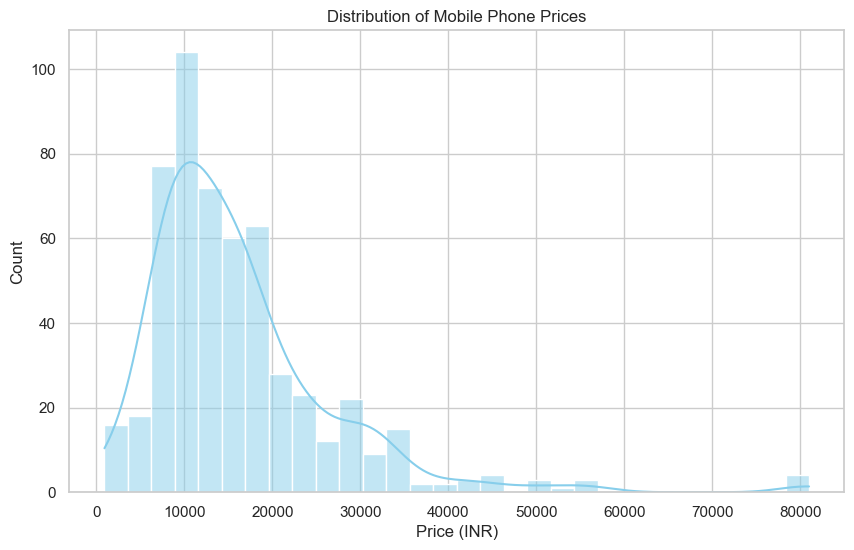

In [14]:
# 1. Distribution plot
plt.figure(figsize=(10,6))
sns.histplot(df['Prize'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Mobile Phone Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Count')
plt.show()

### Insights

* The evidence clearly suggests a high degree of concentration of mobile phone prices in the lower price segments, largely below ₹20,000.
* There is a prominent peak in the distribution at the ₹10,000 level, indicating a high level of sales or availability at this price point.
* There is a perceivable pattern of declining product availability as prices rise above ₹20,000, suggesting a less saturated market for premium devices in this dataset.
* The fact that there are very few data points in the higher end of the price range, over ₹60,000, underscores the under-representation of high-priced mobile phones
* The total shape of the distribution suggests possible market segmentation, with a large segment for price-conscious buyers and smaller segments for mid-range and high-end offerings.
* The right-skewing of the price distribution reinforces the fact that though most phones are reasonably priced, there is a tail of more costly models but in fewer numbers.ers."

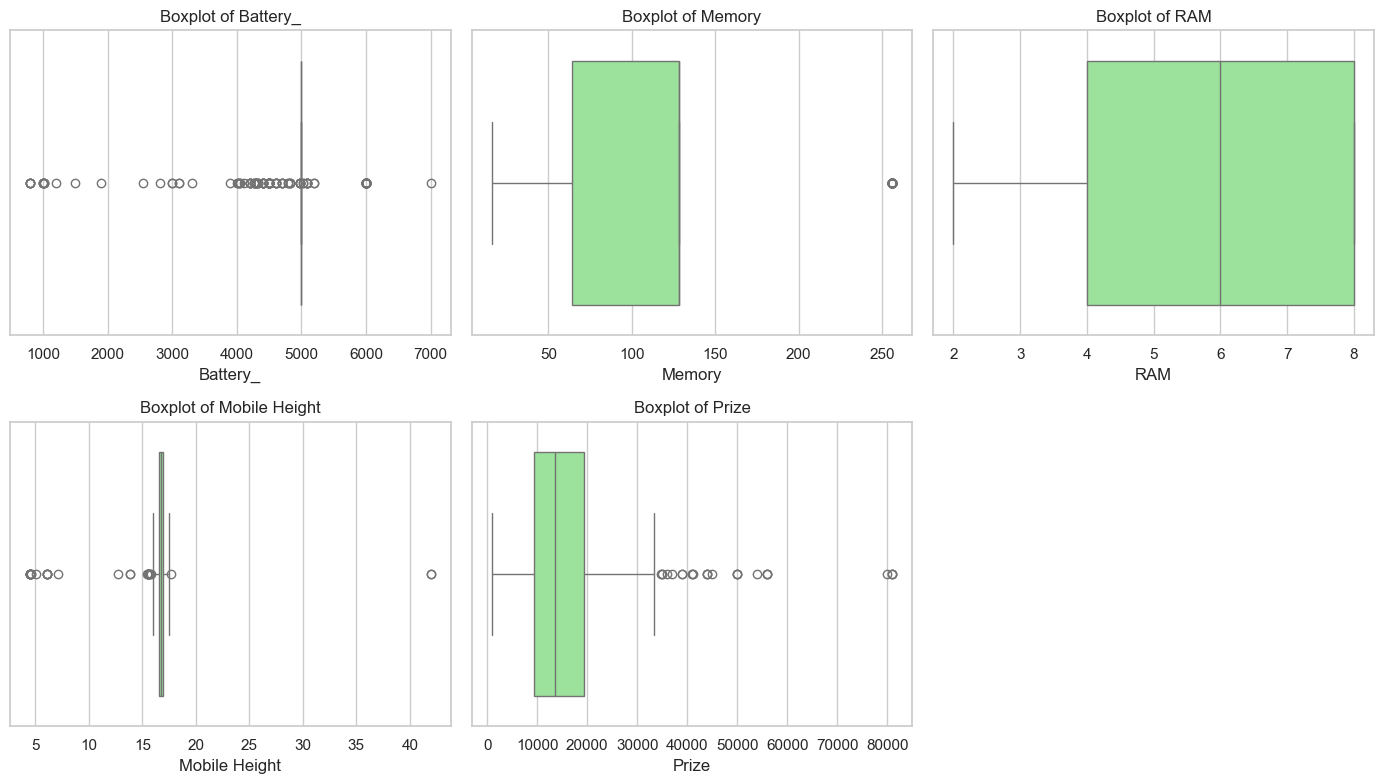

In [16]:
# Boxplots
numeric_features = ['Battery_', 'Memory', 'RAM', 'Mobile Height', 'Prize']
plt.figure(figsize=(14,8))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Insights

##### 1. Battery
* Most phones will have a battery life between in the range of about 2000 and 5000. But look at those few data points way on the right-hand side – that must be those phones with super long battery lives!

##### 2. Memory
* The average phone in this sample has between 64 to 128 GB of storage, or so it appears. There are certainly some that have less, down to the neighborhood of 32 GB, and some that have a great deal more, such as 256 GB.

##### 3. RAM
* It seems like all phones have either 4 GB or 8 GB of RAM. You see a couple with only 2 GB, and then some of the more expensive ones go up to 6 GB.

##### 4. Mobile Height
* The majority of these phones are fairly consistent in their height, being somewhere between around 140 and 160. There are a couple that are shorter and perhaps one or two taller.

##### 5. Price
* The prices of most of the phones are bunched together at the low end, below ₹20,000. But you can see how some phones actually shoot way up in cost, well over ₹40,000 and even touching ₹60,000 or more.

C:\Users\asus\AppData\Local\Temp\ipykernel_2436\2522767882.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette="viridis")


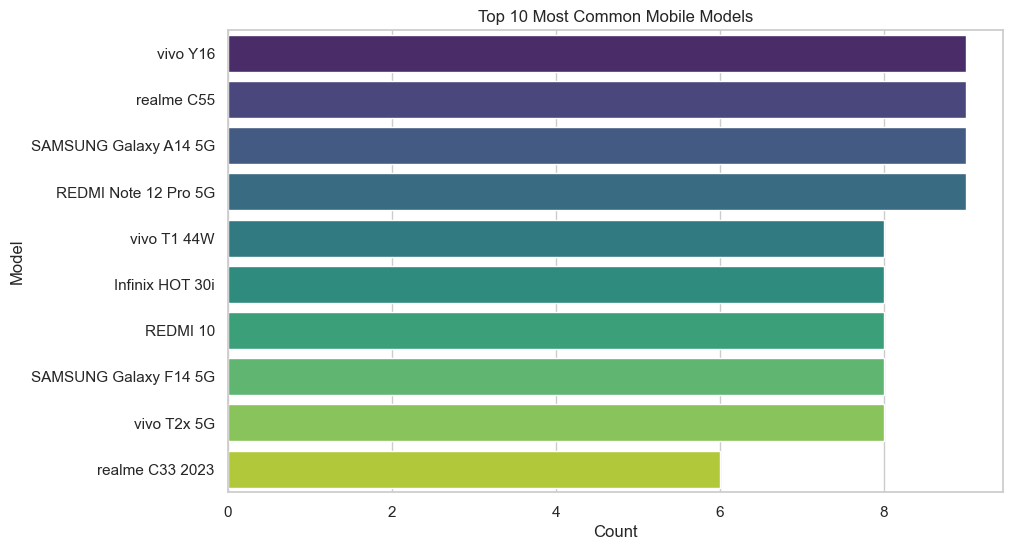

In [17]:
# 3. Top 10 models
top_models = df['Model'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_models.values, y=top_models.index, palette="viridis")
plt.title('Top 10 Most Common Mobile Models')
plt.xlabel('Count')
plt.ylabel('Model')
plt.show()

### Insights

* Vivo Y18 is ubiquitous - it seems like the Vivo Y18 is the most prevalent phone model in this group. It appears the most!
* Realme C55 is close behind - The Realme C55 is another phone that many people appear to have, it's up close to the top.
* Samsung Galaxy A14 5G is also seen: We're seeing quite a number of the Samsung Galaxy A14 5G models as well, it's one of the more common ones.
* Redmi Note 12 Pro 5G is also common - The Redmi Note 12 Pro 5G is another one that appears quite a bit in this data.
* Vivo T1 44W is less frequent than the top ones - The Vivo T1 44W occurs fewer times than the top few models that we've already highlighted.
* Infinix HOT 30i and Redmi 10 are comparable - The Infinix HOT 30i and Redmi 10 look roughly equally as common in this selection.
* There are some less common models - Then you have models such as the Samsung Galaxy F14 5G, Vivo T2x 5G, and Realme C30 2023, which do not appear as commonly as the others in this top ten list.

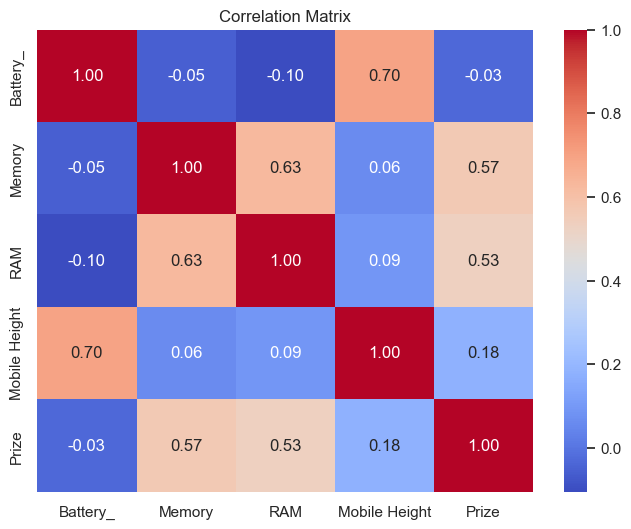

In [18]:
# 4. Heatmap
plt.figure(figsize=(8,6))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Insights
Suppose we're trying to determine whether various things about a phone are connected with one another. This colorful grid assists us in doing so.

* Diagonal is always red (1.00) - Notice that nice red line from top left to bottom right? That's because anything is perfectly connected to itself! Battery is perfectly connected to Battery, Memory to Memory, and so on.
* Battery and Price (-0.03) - That light blue point where 'Battery' and 'Price' intersect? The figure is -0.03, just shy of zero. That means the battery size isn't particularly indicative of how pricey a phone is, or vice versa. They're not highly correlated.
* Memory and Price (0.57) - The orange intersection of 'Memory' and 'Price' with a 0.57 implies a little connection. It's not very strong, but it indicates that phones with higher memory are a bit pricier.
* RAM and Price (0.53) - Like memory, the orange for 'RAM' and 'Price' (0.53) indicates that phones with higher RAM also cost a bit more.
* Mobile Height and Price (0.18) - That weaker orange where 'Mobile Height' and 'Price' intersect (0.18) indicates a very weak positive relationship. More tall phones could cost a little more, but it's not a very solid rule.
* Battery and RAM (-0.10) - The weak light blue (-0.10) between 'Battery' and 'RAM' shows a very weak negative relationship. It doesn't necessarily mean that larger batteries reduce RAM, or something like that – they're fairly separate.
* Memory and RAM (0.63) - The strong orange (0.63) between 'Memory' and 'RAM' lets us know that phones with higher memory have more RAM too. These two attributes tend to go hand in hand.

And so forth. We can look at all the other squares the same way. The more red the color (the closer it is to 1.00), the more positive the connection. The bluer the color (the closer it is to -1.00), the more negative the connection (that is when one increases, the other will tend to decrease). Colors near white (which is around 0) indicate there isn't much of a connection.

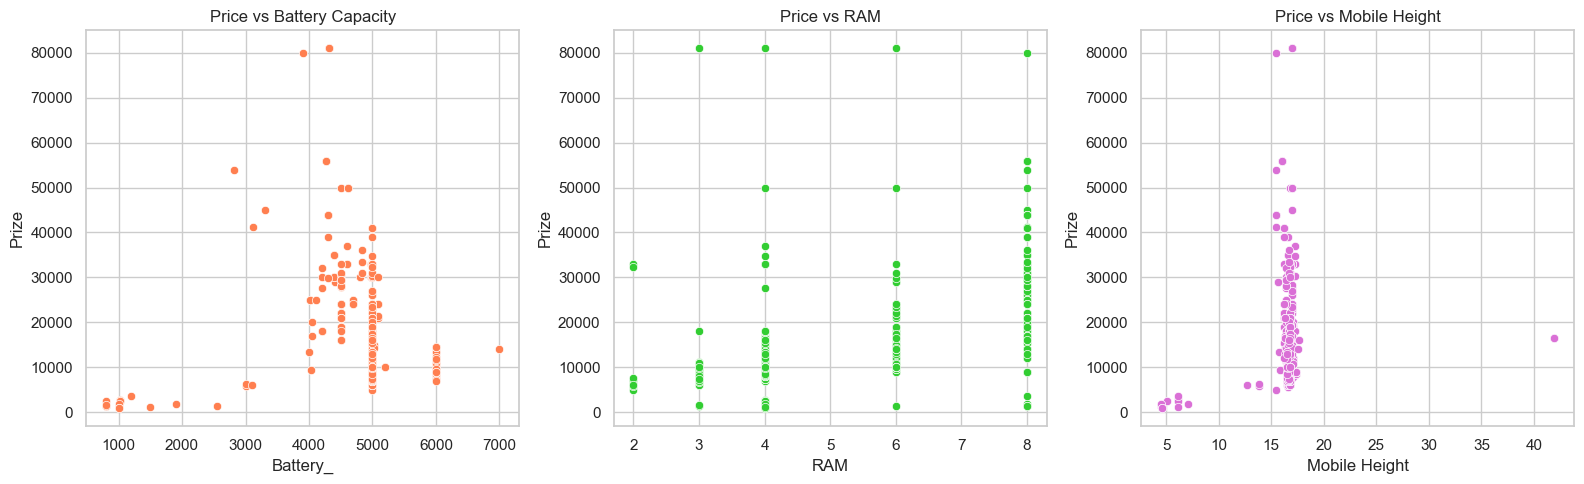

In [19]:
# 5. Scatterplots
plt.figure(figsize=(16,5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Battery_', y='Prize', data=df, color='coral')
plt.title('Price vs Battery Capacity')
plt.subplot(1, 3, 2)
sns.scatterplot(x='RAM', y='Prize', data=df, color='limegreen')
plt.title('Price vs RAM')
plt.subplot(1, 3, 3)
sns.scatterplot(x='Mobile Height', y='Prize', data=df, color='orchid')
plt.title('Price vs Mobile Height')
plt.tight_layout()
plt.show()

### Insights

##### 1. Price vs Battery Capacity
* Notice how the dots are sort of spread out all over? It doesn't really look like phones with large batteries are always more expensive, or that inexpensive phones always have small batteries. There's a bit of everything in there.
* We can have phones with tiny batteries that are inexpensive, and some inexpensive phones with quite large batteries. Same with the more expensive phones - some have large batteries, some do not.
* So, battery size does not appear to be a high predictor of cost in this dataset.

##### 2. Price vs RAM
* But here, We can sort of make out a little trend. The phones with lower RAM (such as 2GB or 3GB) appear to be primarily in the lower price range.
* As the RAM grows to 4GB, 6GB, and particularly 8GB, you find increasingly more phones at the higher prices. It's not an infallible rule, there are still some less expensive phones with greater RAM, but generally speaking, more RAM appears to translate to a higher price.
* So, there's a little correlation – more RAM does come at a higher price.

##### 3. Price vs Mobile Height
* Just like with the battery, the dots here seem pretty scattered. You've got short phones that are cheap, and short phones that are expensive.
* And then you have taller phones that are cheap, and also taller phones that are expensive.
* It doesn't actually look like the phone's height informs you about its price in this data set. They appear to be unrelated to one another

### Conclusion

* Battery does not actually predict price.
* Having more RAM will generally mean that it is more expensive.
* How tall a phone is does not actually inform you whether it is pricey or not.